# OTSU method for thresholding

Computing the within-class variance for each of the two classes for each possible threshold involves a lot of
computation, but there’s an easier way.
If you subtract the within-class variance from the total variance of the combined distribution, you get something
called the between-class variance:

![](http://www.labbookpages.co.uk/software/imgProc/files/otsuEqns/simplification.png)

1. Separate the pixels into two clusters according to the threshold.
2. Find the mean of each cluster.
3. Square the difference between the means.
4. Multiply by the number of pixels in one cluster times the number in the other.

This depends only on the difference between the means of the two clusters, thus avoiding having to calculate differences between individual intensities and the cluster means. The optimal threshold is the one that maximizes the
between-class variance (or, conversely, minimizes the within-class variance).

Sources of info: [Lecture at Bringham Young Uni](http://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/MORSE/threshold.pdf) and [Labbooks](http://www.labbookpages.co.uk/software/imgProc/otsuThreshold.html)

In [3]:
import numpy as np

from skimage import data
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

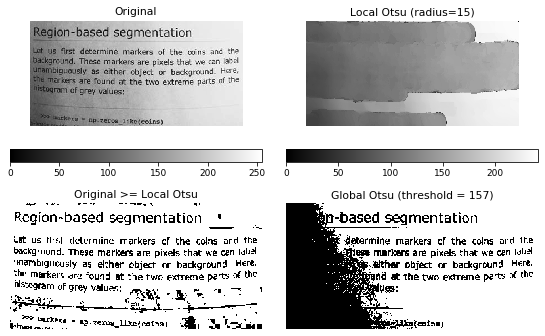

In [12]:
matplotlib.rcParams['font.size'] = 9
img = img_as_ubyte(data.page())

radius = 15
selem = disk(radius)

local_otsu = rank.otsu(img, selem)
threshold_global_otsu = threshold_otsu(img)
global_otsu = img >= threshold_global_otsu

fig, ax = plt.subplots(2, 2, figsize=(8, 5), sharex=True, sharey=True,
                       subplot_kw={'adjustable': 'box'})
ax0, ax1, ax2, ax3 = ax.ravel()
plt.tight_layout()

fig.colorbar(ax0.imshow(img, cmap=plt.cm.gray),
             ax=ax0, orientation='horizontal')
ax0.set_title('Original')
ax0.axis('off')

fig.colorbar(ax1.imshow(local_otsu, cmap=plt.cm.gray),
             ax=ax1, orientation='horizontal')
ax1.set_title('Local Otsu (radius=%d)' % radius)
ax1.axis('off')

ax2.imshow(img >= local_otsu, cmap=plt.cm.gray)
ax2.set_title('Original >= Local Otsu' % threshold_global_otsu)
ax2.axis('off')

ax3.imshow(global_otsu, cmap=plt.cm.gray)
ax3.set_title('Global Otsu (threshold = %d)' % threshold_global_otsu)
ax3.axis('off')

plt.show()